# Part I - (Analysis on Prosper Loan Data)
## by (Ampong Boadu)

## Introduction
> The dataset is on loan disbursed to clients between the year 2005 and 2014. The consist of general characteristics of the loan, that is the amount granted, the current status, interest charged, duration of loan captured in months, as well as characteristics of the borrower. Information of the borrowers' were also captured in the angle of the state of the borrower, borrowers' debt to income ratio, thier occupation, information on their income, their credit score among others.



## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load data to dataframe

df =  pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# Limiting dataframe to columns needed for analysis.

df=df[['LoanKey','LoanStatus','Term','LoanOriginationDate','LoanOriginationQuarter','LoanOriginalAmount',
       'MonthlyLoanPayment','BorrowerAPR','BorrowerRate','DebtToIncomeRatio','IsBorrowerHomeowner','ClosedDate',
       'ListingCategory (numeric)','IncomeRange','ProsperRating (Alpha)','ProsperScore','EmploymentStatus']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    113937 non-null  object 
 1   LoanStatus                 113937 non-null  object 
 2   Term                       113937 non-null  int64  
 3   LoanOriginationDate        113937 non-null  object 
 4   LoanOriginationQuarter     113937 non-null  object 
 5   LoanOriginalAmount         113937 non-null  int64  
 6   MonthlyLoanPayment         113937 non-null  float64
 7   BorrowerAPR                113912 non-null  float64
 8   BorrowerRate               113937 non-null  float64
 9   DebtToIncomeRatio          105383 non-null  float64
 10  IsBorrowerHomeowner        113937 non-null  bool   
 11  ClosedDate                 55089 non-null   object 
 12  ListingCategory (numeric)  113937 non-null  int64  
 13  IncomeRange                11

In [6]:
# Renaming columns to simplier column names

df.rename(columns = {
    'LoanStatus': 'status',
    'Term': 'duration',
    'LoanOriginationDate': 'origination_date',
    'ClosedDate': 'closed_date',
    'LoanOriginalAmount': 'amount',
    'MonthlyLoanPayment': 'monthly_repayment',
    'BorrowerAPR': 'borrower_APR',
    'BorrowerRate': 'borrower_rate',
    'DebtToIncomeRatio': 'debt_income_ratio',
    'IsBorrowerHomeowner': 'home_owner',
    'ListingCategory (numeric)': 'purpose',
    'IncomeRange': 'income_range',
    'ProsperRating (Alpha)': 'prosper_rating',
    'ProsperScore': 'prosper_score',
    'EmploymentStatus': 'employment_status'
}, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LoanKey                 113937 non-null  object 
 1   status                  113937 non-null  object 
 2   duration                113937 non-null  int64  
 3   origination_date        113937 non-null  object 
 4   LoanOriginationQuarter  113937 non-null  object 
 5   amount                  113937 non-null  int64  
 6   monthly_repayment       113937 non-null  float64
 7   borrower_APR            113912 non-null  float64
 8   borrower_rate           113937 non-null  float64
 9   debt_income_ratio       105383 non-null  float64
 10  home_owner              113937 non-null  bool   
 11  closed_date             55089 non-null   object 
 12  purpose                 113937 non-null  int64  
 13  income_range            113937 non-null  object 
 14  prosper_rating      

In [7]:
# Getting year of loan
df['origination_year'] = df.LoanOriginationQuarter.str[3:]
df = df.drop(['LoanOriginationQuarter'], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanKey            113937 non-null  object 
 1   status             113937 non-null  object 
 2   duration           113937 non-null  int64  
 3   origination_date   113937 non-null  object 
 4   amount             113937 non-null  int64  
 5   monthly_repayment  113937 non-null  float64
 6   borrower_APR       113912 non-null  float64
 7   borrower_rate      113937 non-null  float64
 8   debt_income_ratio  105383 non-null  float64
 9   home_owner         113937 non-null  bool   
 10  closed_date        55089 non-null   object 
 11  purpose            113937 non-null  int64  
 12  income_range       113937 non-null  object 
 13  prosper_rating     84853 non-null   object 
 14  prosper_score      84853 non-null   float64
 15  employment_status  111682 non-null  object 
 16  or

In [8]:
# Checking stats of numerical values in dataframe

df.describe()

,duration,amount,monthly_repayment,borrower_APR,borrower_rate,debt_income_ratio,purpose,prosper_score
count,113937.000000,113937.00000,113937.000000,113912.000000,113937.000000,105383.000000,113937.000000,84853.000000
mean,40.830248,8337.01385,272.475783,0.218828,0.192764,0.275947,2.774209,5.950067
std,10.436212,6245.80058,192.697812,0.080364,0.074818,0.551759,3.996797,2.376501
min,12.000000,1000.00000,0.000000,0.006530,0.000000,0.000000,0.000000,1.000000
25%,36.000000,4000.00000,131.620000,0.156290,0.134000,0.140000,1.000000,4.000000
50%,36.000000,6500.00000,217.740000,0.209760,0.184000,0.220000,1.000000,6.000000
75%,36.000000,12000.00000,371.580000,0.283810,0.250000,0.320000,3.000000,8.000000
max,60.000000,35000.00000,2251.510000,0.512290,0.497500,10.010000,20.000000,11.000000


In [9]:
# Dropping null values from Prosper Ratings Columns. The mean is high may influence the results.

df = df[df['prosper_rating'].notna()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanKey            84853 non-null  object 
 1   status             84853 non-null  object 
 2   duration           84853 non-null  int64  
 3   origination_date   84853 non-null  object 
 4   amount             84853 non-null  int64  
 5   monthly_repayment  84853 non-null  float64
 6   borrower_APR       84853 non-null  float64
 7   borrower_rate      84853 non-null  float64
 8   debt_income_ratio  77557 non-null  float64
 9   home_owner         84853 non-null  bool   
 10  closed_date        26005 non-null  object 
 11  purpose            84853 non-null  int64  
 12  income_range       84853 non-null  object 
 13  prosper_rating     84853 non-null  object 
 14  prosper_score      84853 non-null  float64
 15  employment_status  84853 non-null  object 
 16  origination_year   84

In [10]:
# Filling null values in Dept to Income Ratio column with mean value from the column.

df['debt_income_ratio'].fillna((df['debt_income_ratio'].mean()), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanKey            84853 non-null  object 
 1   status             84853 non-null  object 
 2   duration           84853 non-null  int64  
 3   origination_date   84853 non-null  object 
 4   amount             84853 non-null  int64  
 5   monthly_repayment  84853 non-null  float64
 6   borrower_APR       84853 non-null  float64
 7   borrower_rate      84853 non-null  float64
 8   debt_income_ratio  84853 non-null  float64
 9   home_owner         84853 non-null  bool   
 10  closed_date        26005 non-null  object 
 11  purpose            84853 non-null  int64  
 12  income_range       84853 non-null  object 
 13  prosper_rating     84853 non-null  object 
 14  prosper_score      84853 non-null  float64
 15  employment_status  84853 non-null  object 
 16  origination_year   84

In [11]:
# Formatting loan purpose

purpose = {
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business', 
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat', 
    10: 'Cosmetic Procedure', 
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases', 
    15: 'Medical/Dental', 
    16: 'Motorcycle', 
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'
}

# Function to return pourpose in String than Value
def purpose_string(num):
    return purpose[num]

In [12]:
# Applying function with lambda
df['purpose'] = df['purpose'].apply(lambda a : purpose_string(a))
df['purpose'].value_counts()

Debt Consolidation    53180
Other                  9218
Home Improvement       6801
Business               5298
Auto                   2237
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Motorcycle              304
Student Use             274
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Not Available            20
Name: purpose, dtype: int64

In [13]:
# Dropping rows with loan purpose not available from dataframe

df = df[df.purpose != 'Not Available']
df['purpose'].value_counts()

Debt Consolidation    53180
Other                  9218
Home Improvement       6801
Business               5298
Auto                   2237
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Motorcycle              304
Student Use             274
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: purpose, dtype: int64

In [14]:
df.employment_status.value_counts()

Employed         67294
Full-time         7926
Self-employed     4538
Other             3805
Not employed       648
Retired            367
Part-time          255
Name: employment_status, dtype: int64

In [15]:
print(df.income_range.value_counts())
print(df.prosper_rating.value_counts())

$50,000-74,999    25621
$25,000-49,999    24167
$100,000+         15201
$75,000-99,999    14497
$1-24,999          4654
Not employed        648
$0                   45
Name: income_range, dtype: int64
C     18343
B     15580
A     14550
D     14268
E      9789
HR     6932
AA     5371
Name: prosper_rating, dtype: int64


In [16]:
# Cleaning income range for categorical data
df = df[df['income_range'] != 'Not employed']
df = df[df['income_range'] != '$0']

df.income_range.value_counts()

$50,000-74,999    25621
$25,000-49,999    24167
$100,000+         15201
$75,000-99,999    14497
$1-24,999          4654
Name: income_range, dtype: int64

In [17]:
# Dropping duplicates if they exist
df = df.drop_duplicates(subset = ['LoanKey'])

# Checking if dataset contains duplicates
df[df.duplicated()]

,LoanKey,status,duration,origination_date,amount,monthly_repayment,borrower_APR,borrower_rate,debt_income_ratio,home_owner,closed_date,purpose,income_range,prosper_rating,prosper_score,employment_status,origination_year


In [18]:
# Checking shape of dataframe
df.shape

(83269, 17)

In [19]:
# Saving clean data to csv file for Explanatory Slides.
df.to_csv('prosper_loans_clean.csv')

In [20]:
# convert income range and ratings into ordered categorical types

ordinal_var_dict = {'income_range': ['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                    'prosper_rating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'status': ['Current', 'Completed', 'Past Due (1-15 days)','Past Due (16-30 days)',
                               'Past Due (31-60 days)','Past Due (61-90 days)', 'Past Due (91-120 days)',
                               'Past Due (>120 days)', 'Chargedoff', 'Defaulted']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

### What is the structure of your dataset?

> The dataset contains 113,937 loans in number originated between the year 2005 to 2014. The original datase is almost clean with 81 columns. The wrangling done was in dimension of limiting the dataset to columns that will be necessary the analysis.

### What is/are the main feature(s) of interest in your dataset?

> The focal point is to determine the features of loans in individual status especially Chargedoff and Defaulted loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features of the loan such as the amount, repayment, status, date of origination together with features of the borrowers.

## Univariate Exploration

In [21]:
# Fuction to plot count plots
default_color = sb.color_palette()[0]

def count_plot(data, x, **kwargs):
    y = None
    order = None
    if 'y' in kwargs:
        y = kwargs.get('y')
    
    #getting order of x variable
    if 'order' in kwargs:
        order = kwargs.get('order')
    sb.countplot(data = data, x = x, y = y, color = default_color, order = order)
    
    #Checking and adding X_Label to chart
    if 'x_label' in kwargs:
        plt.xlabel(kwargs.get('x_label'))
    
    #Checking and adding X_Label to chart
    if 'y_label' in kwargs:
        plt.ylabel(kwargs.get('y_label'))
    
    #Checking and adding title to chart
    if 'title' in kwargs:
        plt.ylabel(kwargs.get('title'))

#### Question 01

What is the distribution of loan status?

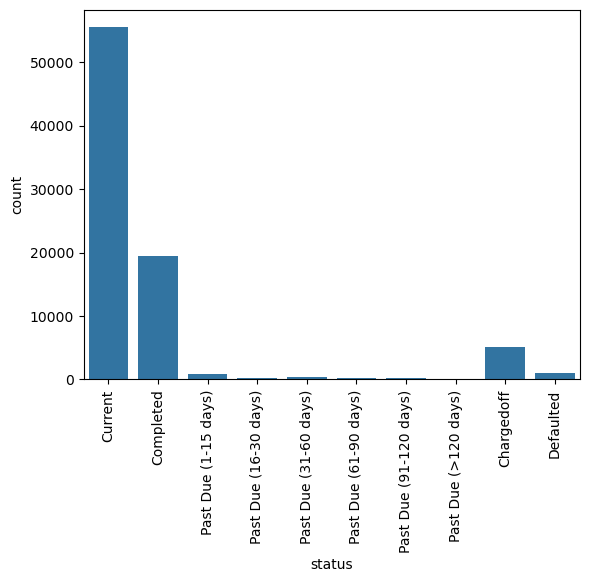

In [22]:
# Bar chart showing loan status
count_plot(df, 'status')
plt.xticks(rotation = 90);

#### Observation

Most of the loans are still active. More than 5000 loans in count have been written off and about half the number have also defaulted their loan payments. Past Due in the data seemed to be on the minimal. It will be good zoom in loans in Past Due.

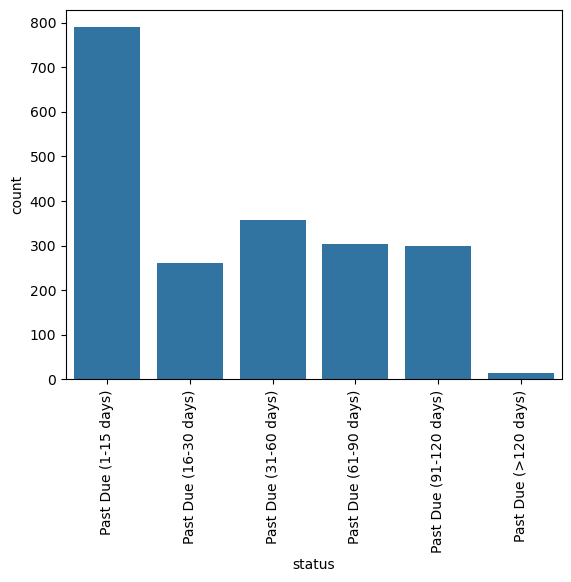

In [23]:
# Bar plot of loans in past due

order = ['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)',
         'Past Due (91-120 days)','Past Due (>120 days)']

count_plot(df[df.status.str[:8] == 'Past Due'], 'status', order = order)
plt.xticks(rotation = 90);

#### Observation

Interestingly, most of the loans in past due happens happens to fall under the first brackets, and the number seems to be dropping as the days late increases.

#### Question 02

Which is year saw most disbursements?

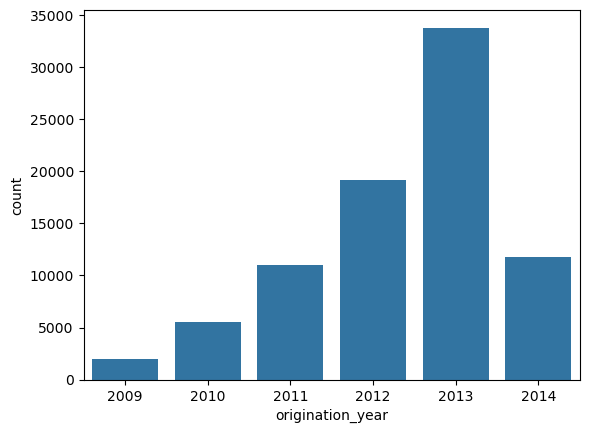

In [24]:
# Bar char showing count of loans per year of origination

year_order = sorted(df['origination_year'].unique())
count_plot(df, 'origination_year', order = year_order)

#### Observation

2013 happens to the year with highest loans. 

#### Question 03

How long do borrowers take to complete loan payments?

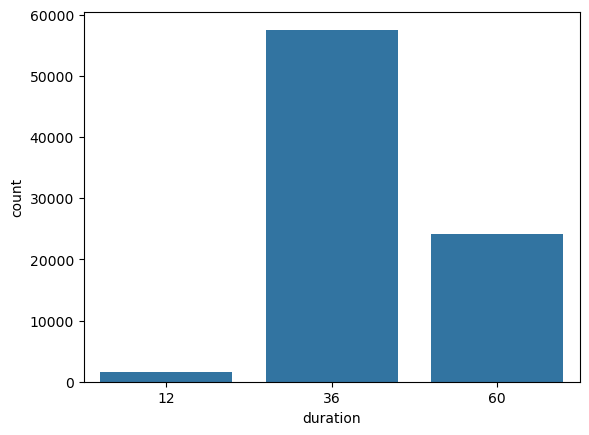

In [25]:
# Bar plot of loans in past due

count_plot(df, 'duration');

#### Observation

About 70 percent of the loans are paid within 3 years, with very little for loans paid in a year.

#### Question 04

What is common reason for borrowers accessing loans?

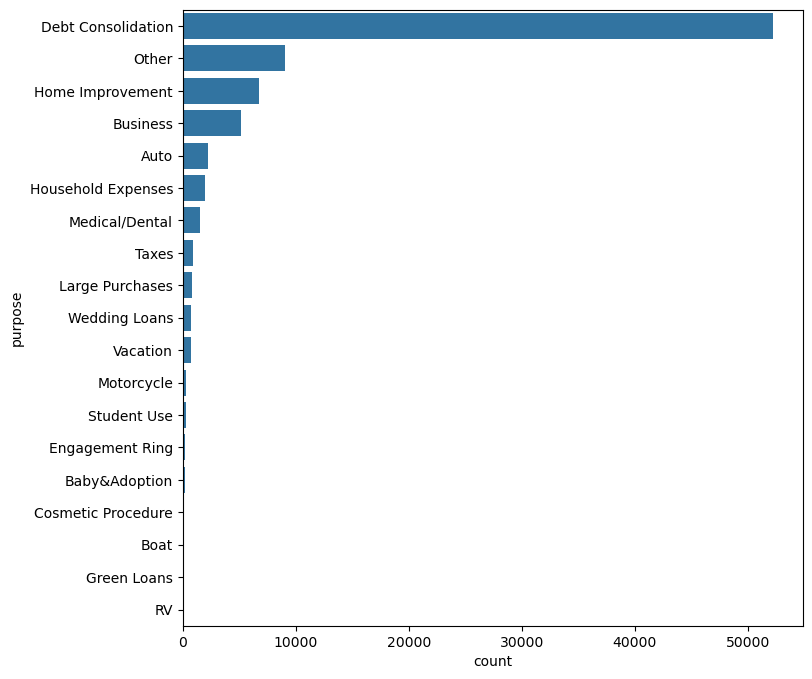

In [26]:
plt.figure(figsize=(8,8))
order = df.purpose.value_counts().index
count_plot(df, None, y = 'purpose', order = order);

#### Observation

Heavy chunck of data indicates that Debt Consolidation as reason for the loans. These can be attributed to multiple borrowing that borrowers want all loans to be converted to one single loan that will deducted once.

#### Question 05

How much do borrowers frequently borrow?

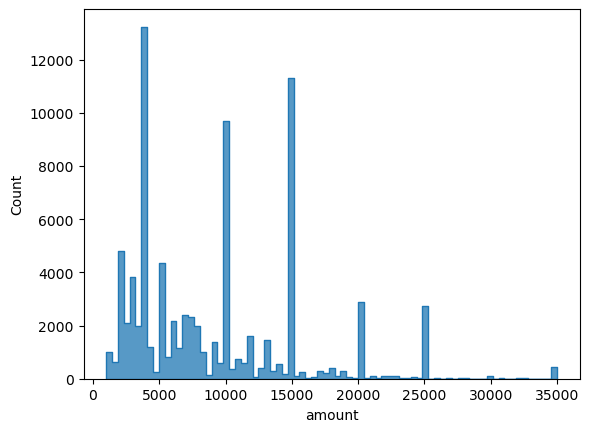

In [27]:
# histogram showing distribution of loan amount

sb.histplot(data = df, x = 'amount', color = default_color, kde = False, element = "step");

#### Observation

The loan amount is highly concerntrated at the lower end of the distribution. Most the loans falls below 15,000 in amount. 

It will be good to look at distribution of repayments as well to see if it show similar trend.

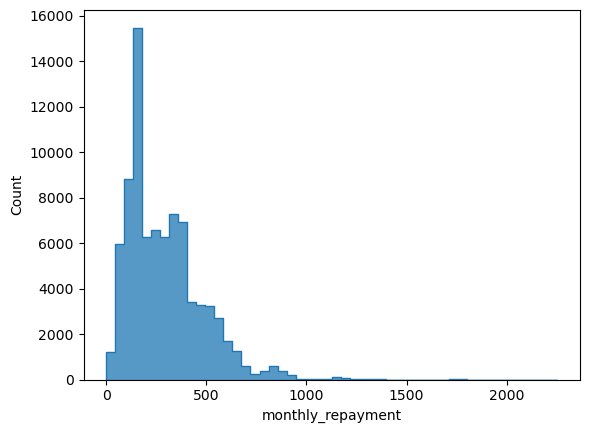

In [28]:
# histogram showing distribution of loan amount

sb.histplot(data = df, x = 'monthly_repayment', kde=False, element = "step", bins = 50);

#### Observation

Just as guessed, repayments are also concerntrated at the lower end of the distribution. It is unimodal and appears skewed to the right.

Now let's explore some characteristics of the borrowers. The very first the Annual Percentage Rate and Interest of the borrowers.

#### Question 06

What is the average borrower rate and Annual Percentage Rate?

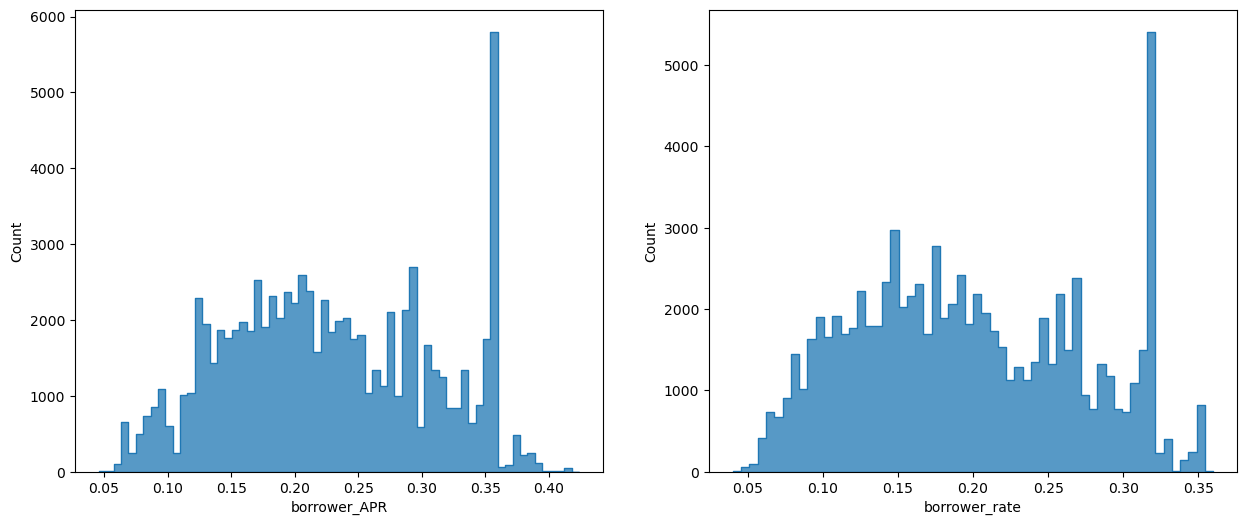

In [29]:
# Distribution of Borrowers' APR and Borrowers, Rate in histogram.

fig, ax = plt.subplots(ncols=2, figsize = [15,6])

sb.histplot(data = df, x = 'borrower_APR', kde=False, color = default_color, element = "step", ax = ax[0]);
sb.histplot(data = df, x = 'borrower_rate', kde=False, color = default_color, element = "step", ax = ax[1]);

#### Observation

Generally APR and borrowers' rate looks good with the data, since all of the borrowers have less than 1% for both. The distributions are bimodal with few spikes to the right.

#### Question 07

What is level of debt on income of borrowers?

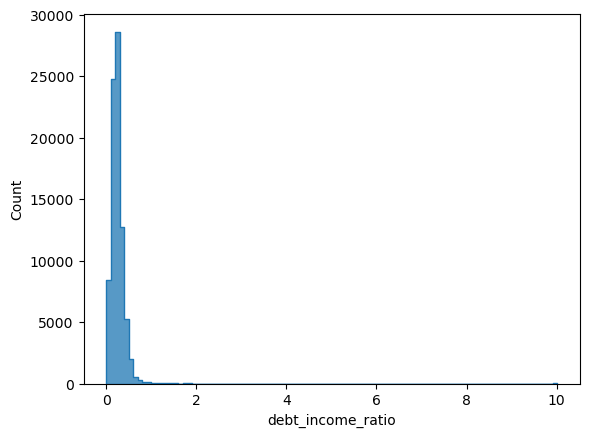

In [30]:
# Histogram showing the distribution of Debt to Income Ratio of Borrowers
sb.histplot(data = df, x = 'debt_income_ratio', kde=False, color = default_color, element = "step", bins = 100);

#### Observation

The borrowers have good ratio with most of them falling below 0.5. The distribution is quiet simple and positively skewed. 

#### Question 08

What income bracket if popular with the borrowers?

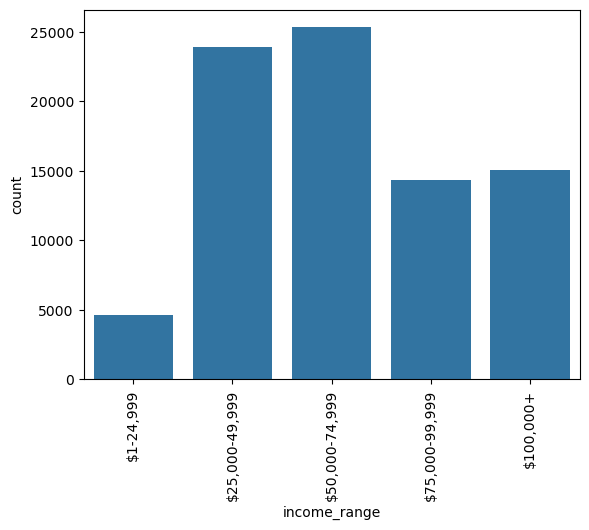

In [31]:
# Bar plot of income range within borrowers

count_plot(df, 'income_range')
plt.xticks(rotation = 90);

#### Observation

The borrowers happens to be mid to high income earners with almost all of them falling above the first income bracket.

#### Question 09

Are the borrowers currently employed?

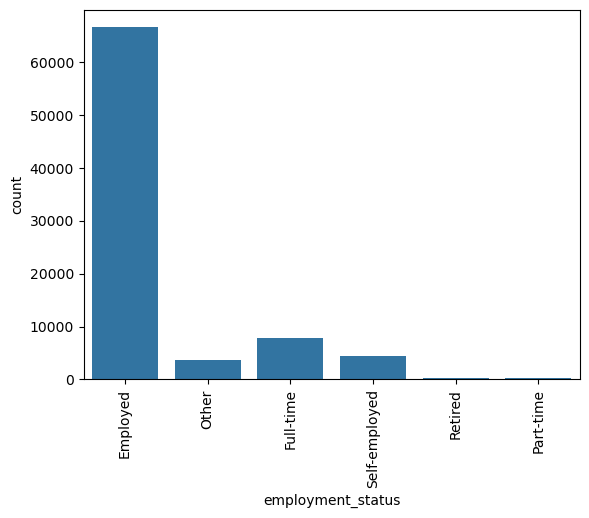

In [32]:
# Bar plot of employement status of borrowers

count_plot(df, 'employment_status')
plt.xticks(rotation = 90);

#### Observation

Most of borrowers are employed. This is very good since there will mostly be earnings to service the montly repayment though there were few of the Retired and few also not fully working.

It will be good to have a look at distribution of Prospers' score and Ratings.

#### Question 10

What is the credit rating of loan borrowers?

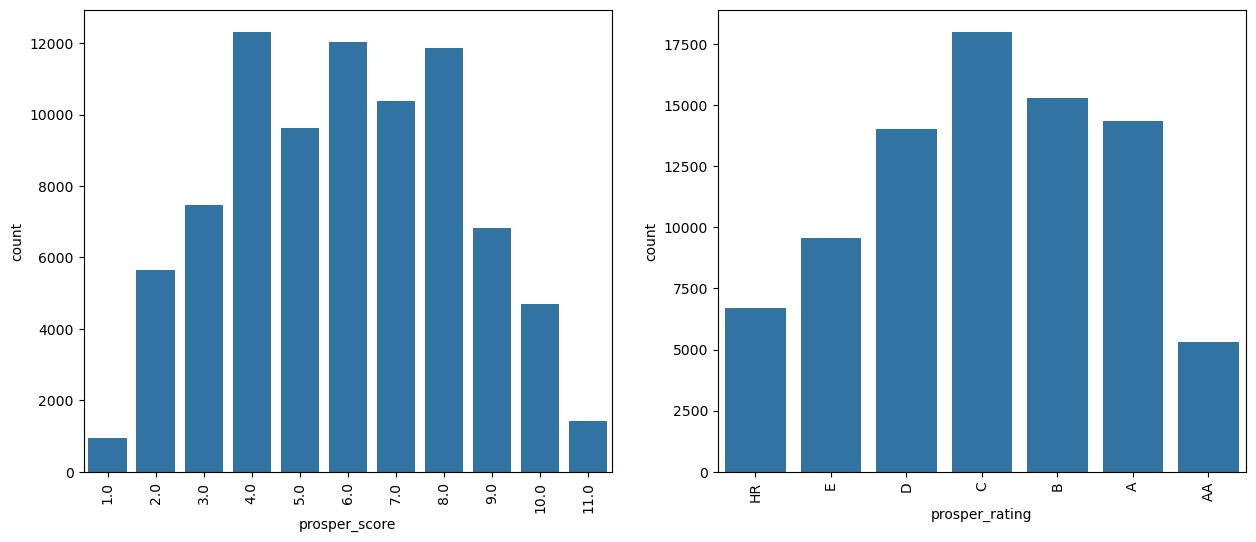

In [33]:
# Distribution of Borrowers' APR and Borrowers, Rate in histogram.

plt.figure(figsize = [15,6])

plt.subplot(1, 2, 1)
count_plot(df, 'prosper_score')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
count_plot(df, 'prosper_rating')
plt.xticks(rotation = 90);

#### Observation

Most of the loans happens to fall in the middle of the Ratings and the Score. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Heavy proportion of the loans were still active. Few were in Past Due status with the number decreasing whilst past due days increases which is very positive trend. Over 75% of the loans were of 36 months duration and the year 2013 happens to have the highest number of loans. Most of the loans was primarily for Debt Consolidation.

> Features of borrowers such as their rate and APR is very minimal which is on the good side. Debt to income ratio also seemed positive with distribution heavily falling below 0.5. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data was clean for the analysis, hence no major wrangling. The distributions are very usual and the preliminary  trends observed are positive.